In [16]:
import numpy as np
import pandas as pd
import random
from tabulate import tabulate

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Carregar os dados de treinamento e teste

In [17]:
# Carregar os dados de treinamento e teste
X_train = pd.read_csv('../Dados/ModelosSimples/X_train.csv')
y_train = pd.read_csv('../Dados/ModelosSimples/y_train.csv')
X_test = pd.read_csv('../Dados/ModelosSimples/X_test.csv')
y_test = pd.read_csv('../Dados/ModelosSimples/y_test.csv')

# Converter y_train e y_test em vetores 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## 2) Pre-processando dados

In [18]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3) Treinando modelo 

In [19]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Teste diferentes valores para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Teste pesos uniformes e ponderados pela distância
    'p': [1, 2],  # Teste distância de Manhattan (p=1) e distância Euclidiana (p=2)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

### 3.1) Tabela comparativa para todas combinações

In [20]:
# Seus dados do GridSearchCV
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  # Adicione o índice de linha (i+1)
    table_data.append(row)

# Crie a tabela usando a função tabulate
table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                    │ Train Score   │ Validation Score   │
╞══════════════╪════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}   │ 0.917857      │ 0.848571           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}  │ 1             │ 0.855714           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   │ 0.9125        │ 0.831429           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'n_neighbors': 3, '

## 4) Predição

In [23]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

## 5) Matriz Confusão

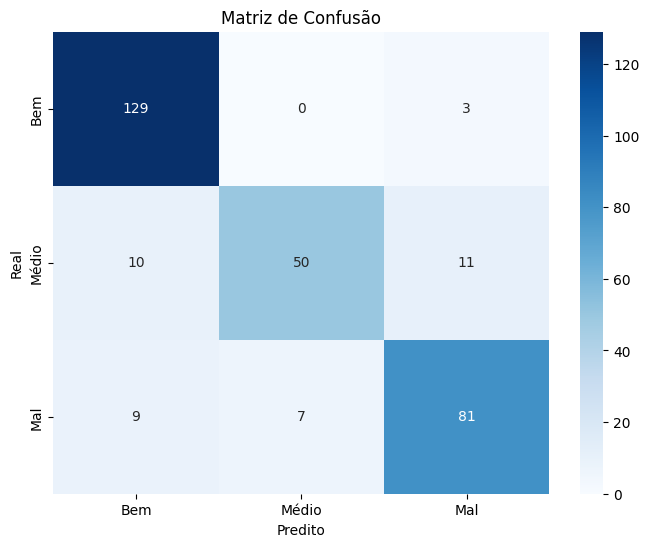

In [24]:
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 6) Métricas de eficácia

In [25]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred) 
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
----------------------------------------------------------------
Acurácia: 0.8666666666666667
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.87      0.98      0.92       132
         Mal       0.88      0.70      0.78        71
       Médio       0.85      0.84      0.84        97

    accuracy                           0.87       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.87      0.87      0.86       300

